In [7]:
from keras.layers.core import Dense,Activation,Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

In [8]:
import lstm, time

In [9]:
seqence_length=5
X_train,y_train,X_test,y_test,p0 = lstm.load_data('GZMT.csv',seqence_length,True)
#print(p0)

In [10]:
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=seqence_length,
    return_sequences=True
))
model.add(Dropout(0.2))

model.add(LSTM(
    256,
    return_sequences=True
))
model.add(Dropout(0.2))

model.add(LSTM(
    128,
    return_sequences=True
))
model.add(Dropout(0.2))

model.add(LSTM(
    64,
    return_sequences=False
))
model.add(Dense(
    output_dim=1
))

model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse',optimizer='rmsprop')
print('Compilation time:',time.time()-start)


Compilation time: 0.015987157821655273


In [11]:
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=100,
    validation_split=0.1
)

Train on 3177 samples, validate on 353 samples
Epoch 1/100
3177/3177 [==============================] - 1s - loss: 0.0027 - val_loss: 0.0023
Epoch 2/100
3177/3177 [==============================] - 0s - loss: 0.0024 - val_loss: 0.0022
Epoch 3/100
3177/3177 [==============================] - 0s - loss: 0.0024 - val_loss: 0.0021
Epoch 4/100
3177/3177 [==============================] - 0s - loss: 0.0023 - val_loss: 0.0022
Epoch 5/100
3177/3177 [==============================] - 0s - loss: 0.0022 - val_loss: 0.0021
Epoch 6/100
3177/3177 [==============================] - 0s - loss: 0.0021 - val_loss: 0.0014
Epoch 7/100
3177/3177 [==============================] - 0s - loss: 0.0017 - val_loss: 0.0012
Epoch 8/100
3177/3177 [==============================] - 0s - loss: 0.0015 - val_loss: 0.0012
Epoch 9/100
3177/3177 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0010
Epoch 10/100
3177/3177 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0012
Epoch 11/100

yo


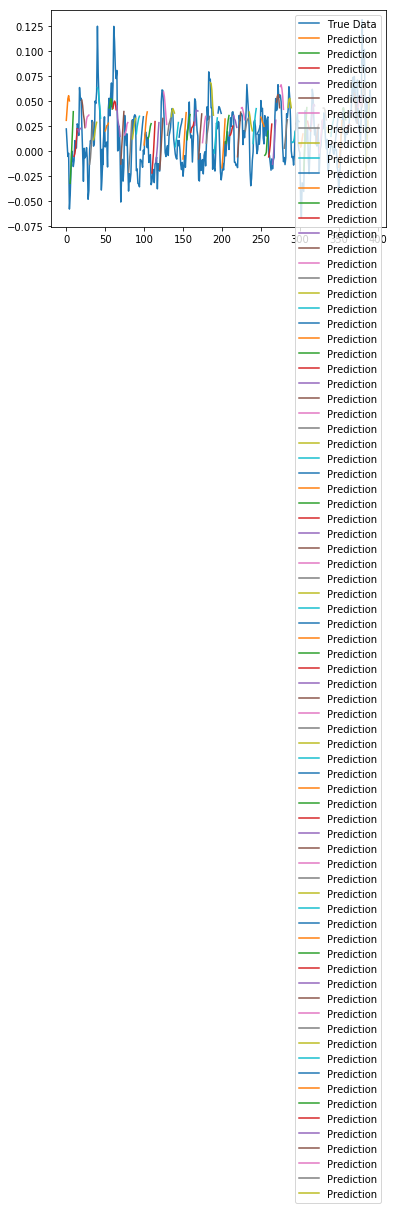

In [12]:
predictions=lstm.predict_sequences_multiple(model,X_test,seqence_length,seqence_length)
lstm.plot_results_multiple(predictions,y_test,seqence_length)

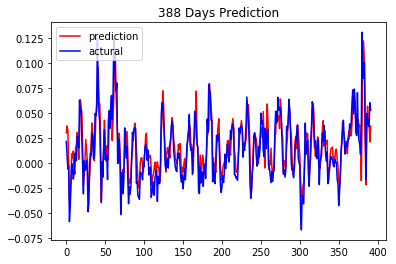

In [13]:
p = model.predict(X_test)
import matplotlib.pyplot as plt2

plt2.plot(p,color='red', label='prediction')
plt2.plot(y_test,color='blue', label='actural')
plt2.legend(loc='upper left')
plt2.title("388 Days Prediction")
plt2.show()

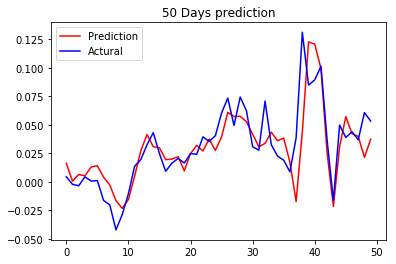

In [14]:
plt2.plot(p[-50:],color='red', label='Prediction')
plt2.plot(y_test[-50:],color='blue', label='Actural')
plt2.legend(loc='upper left')
plt2.title("50 Days prediction")
plt2.show()

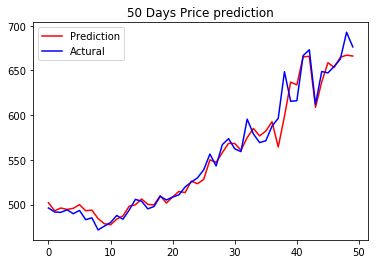

In [15]:
import numpy as np
size = np.shape(X_test)[0]

pred = p[:]
act = y_test[:]
for i in range(size):
    pn=float(p0[-(seqence_length+(size-i))])
    pred[i]=(pred[i]+1)*pn
    act[i]=(act[i]+1)*pn
plt2.plot(pred[-50:],color='red', label='Prediction')
plt2.plot(act[-50:],color='blue', label='Actural')
plt2.legend(loc='upper left')
plt2.title("50 Days Price prediction")
plt2.show()

In [16]:
ans=pred[-1]
print("最新预测",ans)

最新预测 [ 666.08111572]


Sequence length: 100 | epoch:6 | prediction :600
Sequence length: 100 | epoch:100 | prediction :656
Sequence length: 60  | epoch:6 | prediction :652
Sequence length: 55  | epoch:6 | prediction :654
Sequence length: 50  | epoch:6 | prediction :642
Sequence length: 50 | epoch:100 | prediction :682
Sequence length: 5 | epoch:100 | prediction :666